### Data reprsentations for neural networks
 tensors = multidimensional Numpy arrays
 
 #### Scalars (0D tensors). 
Aka 0-dimensional tensor. The number of axes of a tensor is also called its rank.

 #### 3D tensors and higher-dimensional tensors
 

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)

3


In [2]:
print(train_images.dtype)

uint8


So, MNIST has 3D tensor of 8-bit integers. More descriptively, it is an array of 60, 000 matrices of 28 x 8 integers. Each such matrix is a grayscale image, with coefficients betwen 0 and 255.

#### Let's display the fourth digit in the this 3D tensor using Matplotlib

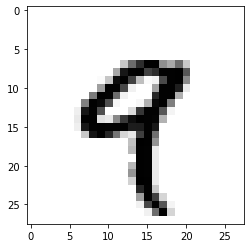

In [3]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

#### Manipulating tensors in Numpy
Selecting specific elements in a tensor is called tensor slicing.


#### The notion of data batches
Deep learning models don't process an entire dataset at once; rathe, they break the data into small batches. 

#### Real-world examples of data tensors

1. Vector data - 2D tensors of shape

2. Images - 4D tensors of shape


### Timeseries data or sequence data 
Whenever time matters in your data (or notion of sequence order), it makes sense to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors ( 2D tensor), and thus a batch of data will be encoded as a 3D tensor. 

The time axis is always the second axis (axis of index 1), by convention. Eg. a dataset of stock prices. 

#### Video data
Video data is one of the few types of real-world data for which you'll need 5D tensors. 5D tensor of shape (samples, frames, height, width, color_depth)


### The gears of neural networks: tensor operations


#### Element-wise operations

Defining a relu by using element-wise operation 


In [10]:
def naive_relu (x):
    assert len(x.shape) == 2 # x is a 2D numpy tensor
    
    x = x.copy() #avoid overwriting the input tensor
    
    for i in range (x.shape[0]):
        for j in range (x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            
    return x

In [17]:
naive_relu (train_images[4])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Tensor Dot

Not to be confused with element-wise product!


In [18]:
import numpy as np

def naive_matrix_vector_dot(x, y):
    assert len (x.shape) == 2 # assert function make sure that x.shape is = to 2, otherwise throw error
    
    assert len (y.shape) == 1
    assert x.shape [1] == y.shape[0] # rule to be followed to multiply matrixs
    
    z = np.zeros(x.shape[0])
    
    for i in range (x.shape[0]):
        for j in range (x.shape[1]):
            z[i] += x[i, j] * y[j]
    
    return z

### Tensor reshaping


In [42]:
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
print(x)
print('\n \n shape is : ', x.shape)

[[0. 1.]
 [2. 3.]
 [4. 5.]]

 
 shape is :  (3, 2)


In [44]:
# reshaping

x = x.reshape((6, 1))

print (x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [60]:
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
print (x)

x = x.reshape((2, 3))



print ('\n', x)



[[0. 1.]
 [2. 3.]
 [4. 5.]]

 [[0. 1. 2.]
 [3. 4. 5.]]


In [61]:
# transpose

x = np.array([[0., 1.], [2., 3.], [4., 5.]])
print ('\n \n transposed x \n', np.transpose(x))


 
 transposed x 
 [[0. 2. 4.]
 [1. 3. 5.]]


### Geometrical interpretation of tensor operations



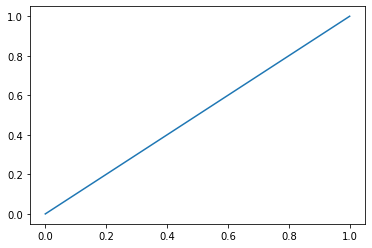

In [65]:
x = np.array([0., 1.])

import matplotlib.pyplot as plt
plt.plot(x)
plt.show()

### A geometrical interpretation of deep learning

Neural networks consist entirely of chains of tensor operations and that all of these tensor operations are just geometric transformations of the input data.

It follows that it can be interpret a neural network as a very complex geometric transformation in a high-dimensional space, implemented via a long series of simple steps. 


Deep Learning can be think as a process of uncrumbling crumbled paper sheet.

### The engine of neural networks: gradient-based optimization

What happens inside the training loop?

1. Draw a batch of training samples x and corresponding targets y

2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.

3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.

4. Update all weights of the network in a way that slightly reduces the loss on this batch.

All above steps except 4 is quite simpler but the step 4 is a bit tricky one. 

The difficult part is step 4: updating the network’s weights. Given an individual weight coefficient in the network, how can you compute whether the coefficient should be increased or decreased, and by how much?



### Stochastic gradient descent

Given that the function (used in DL as the main hero) is differentiable, it is possible to find points where it has minima. But for large dimensional problems, above algorithm becomes handy. 

Let's look into the updated algorithm for stochastic gradient descent.

1. Draw a batch of training samples x and corresponding tragets y

2. Run the network on x to obtain predictions y_pred

3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.

4. Compute the gradient (derivative/rate of change) of the loss with regard to the network parameters (a backward pass)

5. Move the parameters a little in the opposite direction from the gradient-for example W = -step * gradient- thus reducing the loss on the batch a bit.


Stochastic is a scientific synonym of random. 


### Chaining derivatives : the Backpropagation algorithm

Backpopagation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter had in the loss value. (this is nice in deed!)

### Book: Deep Learning with Python by Francois Chollet; 

### Chapter 2; Before we begin: the mathematical building blocks of neural networks


## Chapter 3: Getting started with neural networks